# Super Heroes Advanced Transformation (Core)

04/28/2022

In [197]:
# I. Clean the files and combine them into one final DataFrame.

# This dataframe should have the following columns:
#     Hero (Just the name of the Hero)
#     Publisher
#     Gender
#     Eye color
#     Race
#     Hair color
#     Height (numeric)
#     Skin color
#     Alignment
#     Weight (numeric)
# Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
#     Agility
#     Flight
#     Superspeed
#     etc.
# Hint: There is a space in "100 kg" or "52.5 cm"

In [198]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

### I. Clean the files and combine them into one final DataFrame.



In [199]:
df = pd.read_csv('Data/superhero_info - superhero_info.csv')
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


Seperating Hero/ Publisher

In [201]:
df['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

In [202]:
df['Hero|Publisher'].str.split('|',expand=True)


,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [203]:
## save the 2 new columns into the dataframe
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|',expand=True)
df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [204]:
## drop the original column 
df = df.drop(columns=['Hero|Publisher'])
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


Seperating height and weight

In [205]:
meas = df.loc[0,'Measurements']
print(type(meas))
meas

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [206]:
meas = meas.replace("'",'"')
meas

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [207]:
## use .str.replace to replace all single quotes
df['Measurements'] = df['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
df['Measurements'] = df['Measurements'].apply(json.loads)
df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [208]:
## slice out a measurements to height and weight
df['Measurements'].apply(pd.Series)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [209]:
 ## use .apply pd.Series to convert a dict to columns
Hei_wei = df['Measurements'].apply(pd.Series)
Hei_wei

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [210]:
#concatenate the new columns into the dataframe and drop the original
df =  pd.concat([df.drop(columns=['Measurements']),
                Hei_wei],axis =1)

In [211]:
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [212]:
hei = df.loc[0,"Height"]
print(type(hei))
hei

<class 'str'>


'203.0 cm'

In [213]:
hei = hei.replace(" cm","")
hei

'203.0'

In [214]:
df['Height'] = df['Height'].str.replace(" cm","")
df['Weight'] = df['Weight'].str.replace(" kg","")


In [215]:
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [216]:
#convert data types
df['Height'] = df['Height'].astype(float)
df['Weight'] = df['Weight'].astype(float)


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [218]:
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [219]:
df2 = pd.read_csv('Data/superhero_powers - superhero_powers.csv')
df2.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [221]:
df2.loc[0,'Powers']


'Agility,Super Strength,Stamina,Super Speed'

In [222]:
df2['Powers_split'] = df2['Powers'].str.replace(",",'","')
df2['Powers_split'].head()

0     Agility","Super Strength","Stamina","Super Speed
1    Accelerated Healing","Durability","Longevity",...
2    Agility","Accelerated Healing","Cold Resistanc...
3                                   Lantern Power Ring
4    Accelerated Healing","Intelligence","Super Str...
Name: Powers_split, dtype: object

In [223]:
df2['Powers_split'] = '["' + df2['Powers_split'].astype(str) + '"]'
df2['Powers_split'].head()

0    ["Agility","Super Strength","Stamina","Super S...
1    ["Accelerated Healing","Durability","Longevity...
2    ["Agility","Accelerated Healing","Cold Resista...
3                               ["Lantern Power Ring"]
4    ["Accelerated Healing","Intelligence","Super S...
Name: Powers_split, dtype: object

In [224]:
df2.loc[0,'Powers_split']

'["Agility","Super Strength","Stamina","Super Speed"]'

In [225]:
df2['Powers_split'] = df2['Powers_split'].apply(json.loads)
df2['Powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: Powers_split, dtype: object

In [226]:
df2['Powers_split'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [227]:
df2.head()

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [228]:
df2.explode('Powers_split')

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [229]:
exploded =df2.explode('Powers_split')

In [230]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make


array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [231]:
for col in cols_to_make:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()

/Users/vinosraj/opt/anaconda3/envs/dojo-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 170 entries, hero_names to Changing Armor
dtypes: bool(167), object(3)
memory usage: 124.5+ KB


In [233]:
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [234]:
unique_ids = sorted(df['Hero'].unique())
unique_ids[:3]

['A-Bomb', 'Abe Sapien', 'Abin Sur']

In [235]:
## make integers for each id
int_ids = range(len(unique_ids))
int_ids

range(0, 455)

In [236]:
## Converting our range to a list and showing the first 10 values
example_range = list(int_ids)
example_range[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [237]:
# Zip together the unique_ids as the keys and the int_ids as the values
id_map = dict(zip(unique_ids,int_ids))
id_map

{'A-Bomb': 0,
 'Abe Sapien': 1,
 'Abin Sur': 2,
 'Abomination': 3,
 'Absorbing Man': 4,
 'Adam Strange': 5,
 'Agent Bob': 6,
 'Agent Zero': 7,
 'Air-Walker': 8,
 'Ajax': 9,
 'Alan Scott': 10,
 'Alien': 11,
 'Amazo': 12,
 'Ammo': 13,
 'Angel': 14,
 'Angel Dust': 15,
 'Angel Salvadore': 16,
 'Animal Man': 17,
 'Annihilus': 18,
 'Ant-Man': 19,
 'Ant-Man II': 20,
 'Anti-Venom': 21,
 'Apocalypse': 22,
 'Aqualad': 23,
 'Aquaman': 24,
 'Arachne': 25,
 'Archangel': 26,
 'Arclight': 27,
 'Ardina': 28,
 'Ares': 29,
 'Ariel': 30,
 'Armor': 31,
 'Atlas': 32,
 'Atom': 33,
 'Atom Girl': 34,
 'Atom II': 35,
 'Aurora': 36,
 'Azazel': 37,
 'Bane': 38,
 'Banshee': 39,
 'Bantam': 40,
 'Batgirl': 41,
 'Batgirl IV': 42,
 'Batgirl VI': 43,
 'Batman': 44,
 'Batman II': 45,
 'Battlestar': 46,
 'Beak': 47,
 'Beast': 48,
 'Beast Boy': 49,
 'Beta Ray Bill': 50,
 'Big Barda': 51,
 'Big Man': 52,
 'Binary': 53,
 'Bishop': 54,
 'Bizarro': 55,
 'Black Adam': 56,
 'Black Bolt': 57,
 'Black Canary': 58,
 'Black Cat': 

In [238]:
## demonstrating using id_map to get iteger id 
example_str_id = 'X-23'
id_map[example_str_id]

448

In [239]:
df['Hero'].map(id_map)


0        0
1        1
2        2
3        3
4        4
      ... 
458    450
459    451
460    452
461    453
462    454
Name: Hero, Length: 463, dtype: int64

In [240]:
df['id']=df['Hero'].replace(id_map)

In [241]:
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,id
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,1
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,2
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,3
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,4


In [242]:
id_lookup = pd.DataFrame({'str_id': id_map.keys(),
                         'int_id':id_map.values()})
id_lookup.head(3)

,str_id,int_id
0,A-Bomb,0
1,Abe Sapien,1
2,Abin Sur,2


In [243]:
df2.head(2)

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [244]:
unique_ids2 = sorted(df2['hero_names'].unique())
unique_ids2[:3]


['3-D Man', 'A-Bomb', 'Abe Sapien']

In [245]:
## make integers for each id
int_ids2 = range(len(unique_ids2))
int_ids2

range(0, 667)

In [246]:
# Zip together the unique_ids as the keys and the int_ids as the values
id_map2 = dict(zip(unique_ids2,int_ids2))
id_map2


{'3-D Man': 0,
 'A-Bomb': 1,
 'Abe Sapien': 2,
 'Abin Sur': 3,
 'Abomination': 4,
 'Abraxas': 5,
 'Absorbing Man': 6,
 'Adam Monroe': 7,
 'Adam Strange': 8,
 'Agent Bob': 9,
 'Agent Zero': 10,
 'Air-Walker': 11,
 'Ajax': 12,
 'Alan Scott': 13,
 'Alex Mercer': 14,
 'Alex Woolsly': 15,
 'Alien': 16,
 'Allan Quatermain': 17,
 'Amazo': 18,
 'Ammo': 19,
 'Ando Masahashi': 20,
 'Angel': 21,
 'Angel Dust': 22,
 'Angel Salvadore': 23,
 'Angela': 24,
 'Animal Man': 25,
 'Annihilus': 26,
 'Ant-Man': 27,
 'Ant-Man II': 28,
 'Anti-Monitor': 29,
 'Anti-Spawn': 30,
 'Anti-Venom': 31,
 'Apocalypse': 32,
 'Aquababy': 33,
 'Aqualad': 34,
 'Aquaman': 35,
 'Arachne': 36,
 'Archangel': 37,
 'Arclight': 38,
 'Ardina': 39,
 'Ares': 40,
 'Ariel': 41,
 'Armor': 42,
 'Astro Boy': 43,
 'Atlas': 44,
 'Atom': 45,
 'Atom Girl': 46,
 'Atom II': 47,
 'Atom III': 48,
 'Atom IV': 49,
 'Aurora': 50,
 'Azazel': 51,
 'Azrael': 52,
 'Aztar': 53,
 'Bananaman': 54,
 'Bane': 55,
 'Banshee': 56,
 'Bantam': 57,
 'Batgirl': 58,

In [247]:
df2['hero_names'].map(id_map2)


0        0
1        1
2        2
3        3
4        4
      ... 
662    662
663    663
664    664
665    665
666    666
Name: hero_names, Length: 667, dtype: int64

In [248]:
df2.head()


,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [249]:
id_lookup2 = pd.DataFrame({'str_id2': id_map2.keys(),
                         'int_id2':id_map2.values()})
id_lookup2.head(3)

,str_id2,int_id2
0,3-D Man,0
1,A-Bomb,1
2,Abe Sapien,2


In [250]:
merged = pd.merge(df, df2, left_on='Hero', right_on='hero_names')


merged.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False


In [251]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 181 entries, Gender to Changing Armor
dtypes: bool(167), float64(2), int64(1), object(11)
memory usage: 129.8+ KB


In [252]:
(merged['hero_names'] == "Abin Sur").value_counts()

False    462
True       1
Name: hero_names, dtype: int64

In [253]:
print(merged.iloc[18,:15])

Gender                                                       Male
Race                                                      Unknown
Alignment                                                     bad
Hair color                                                No Hair
Eye color                                                   green
Skin color                                                Unknown
Hero                                                    Annihilus
Publisher                                           Marvel Comics
Height                                                      180.0
Weight                                                       90.0
id                                                             18
hero_names                                              Annihilus
Powers          Agility,Durability,Flight,Super Strength,Stami...
Powers_split    [Agility, Durability, Flight, Super Strength, ...
Agility                                                      True
Name: 18, 

In [254]:
merged['Super Speed'].value_counts()

False    265
True     198
Name: Super Speed, dtype: int64

### II. Use your combined DataFrame to answer the following questions.

1. Compare the average weight of super powers who have Super Speed to those who do not.

In [255]:
AveWSuperSpeed=merged.loc[(merged["Super Speed"]), "Weight"].mean().round(2)
print(f"Average weight of those with Super speed is {AveWSuperSpeed} kg")

Average weight of those with Super speed is 129.4 kg


In [256]:
AveWNSuperSpeed=merged.loc[~(merged["Super Speed"]), "Weight"].mean().round(2)
print(f"Average weight of those without Super speed is {AveWNSuperSpeed} kg")

Average weight of those without Super speed is 101.77 kg


What is the average height of heroes for each publisher?


In [257]:
Average_Height= merged.groupby(['Publisher'])['Height'].mean().sort_values().round(2)
Average_Height

Publisher
George Lucas         159.60
Shueisha             171.50
Dark Horse Comics    176.91
Unknown              178.00
Team Epic TV         180.75
Star Trek            181.50
DC Comics            181.92
Marvel Comics        191.55
Image Comics         211.00
Name: Height, dtype: float64

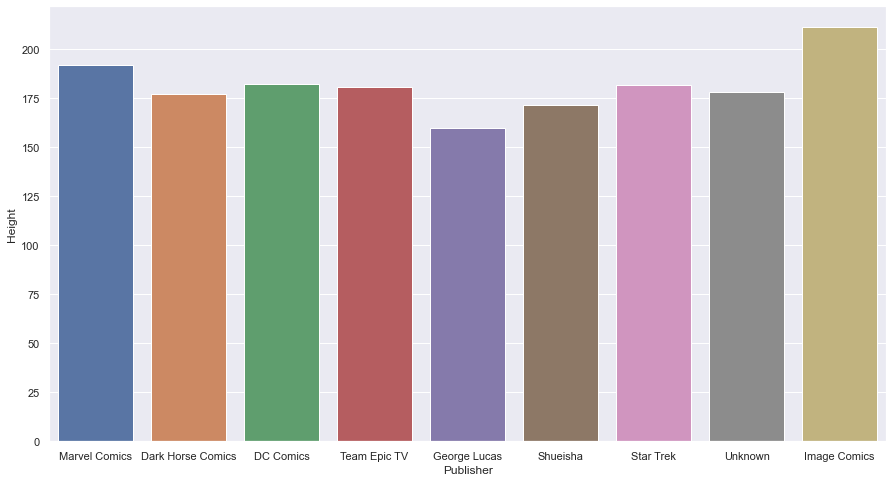

In [260]:
from numpy import mean
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(y="Height",x="Publisher", data=merged, 
    estimator= mean,ci=None);

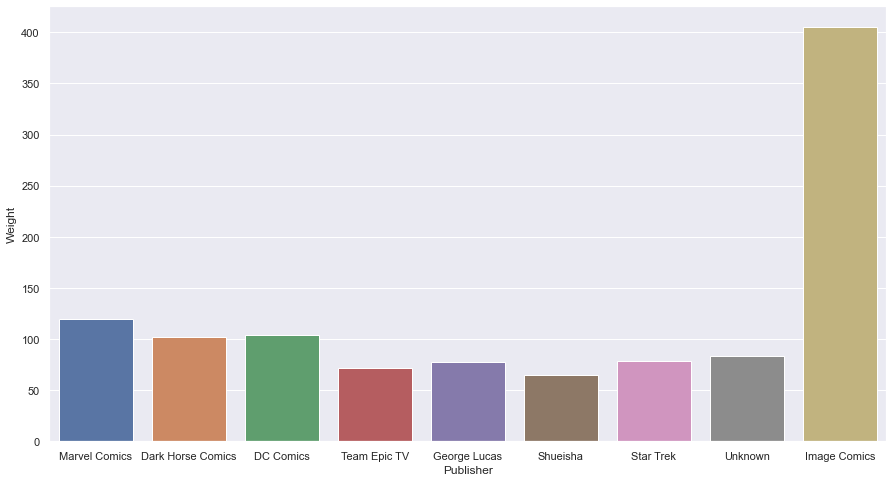

In [261]:
from numpy import mean
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(y="Weight",x="Publisher", data=merged, 
    estimator= mean,ci=None);

In [262]:
merged['Publisher'].value_counts()

Marvel Comics        297
DC Comics            138
Dark Horse Comics     11
George Lucas           5
Team Epic TV           4
Shueisha               4
Star Trek              2
Unknown                1
Image Comics           1
Name: Publisher, dtype: int64

In [265]:
print(merged.loc[merged['Publisher'] == 'Image Comics'])

    Gender   Race Alignment Hair color Eye color Skin color   Hero  \
381   Male  Demon      good      Black     brown    Unknown  Spawn   

        Publisher  Height  Weight  ...  Weather Control Omnipresent  \
381  Image Comics   211.0   405.0  ...            False       False   

    Omniscient Hair Manipulation  Nova Force  Odin Force  Phoenix Force  \
381      False             False       False       False          False   

     Intuitive aptitude  Melting  Changing Armor  
381               False    False           False  

[1 rows x 181 columns]


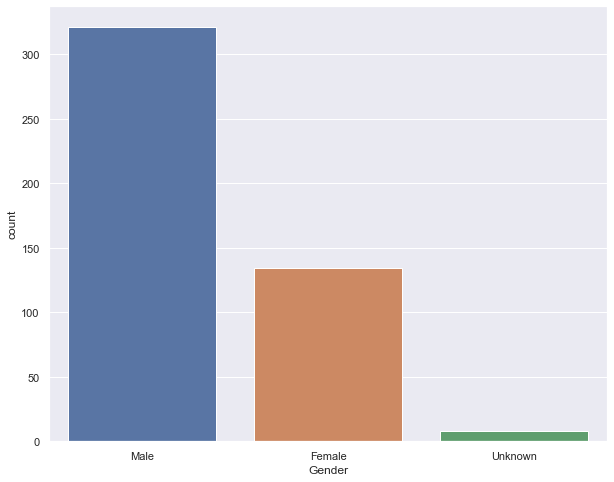

In [266]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot (data =merged, x ='Gender')

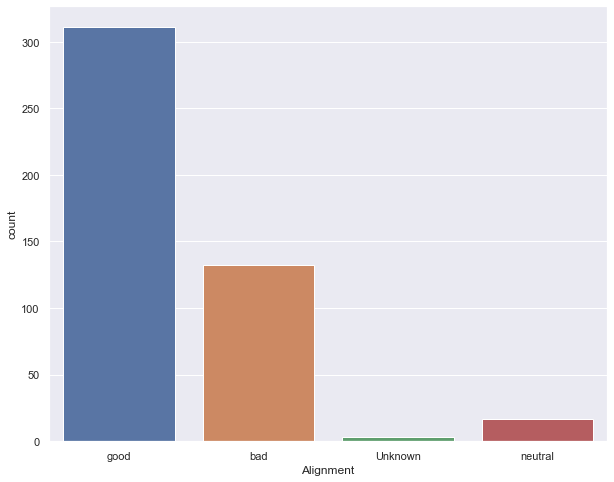

In [267]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot (data =merged, x ='Alignment')